### ランダム・ウォークと破産問題
#### 確率過程
いま各時点で観測されるデータは確率変数の実現値とみなす。
離散的に観測する場合は、時点を$n(n=0,±1,±2,\cdots)$、観測値を$X_n$、連続的に観測する場合は、時点を$t(-\infty< t <\infty)$、観測値を$X_t$と記す。
ただし、$n,t$はそれぞれ整数、実数の一部分を動くこともある。
このとき確率変数の集合$\{X_n\},\{X_t\}$を標本関数、サンプルパスということがある。

#### ランダム・ウォーク
時点$0,1,2,\cdots$で観測し、各時点で確率$p$で上へ1、確率$q=1-p$で下へ1単位移動すると仮定する。
これはランダム・ウォークと呼ばれる。

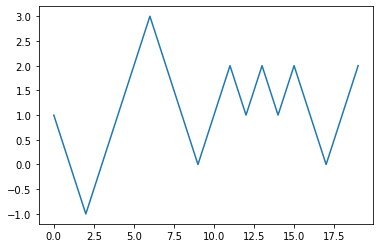

In [36]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.5

x = np.array([np.random.binomial(1, p) for _ in np.arange(20)])
x[x==0] = -1

plt.plot(x.cumsum())

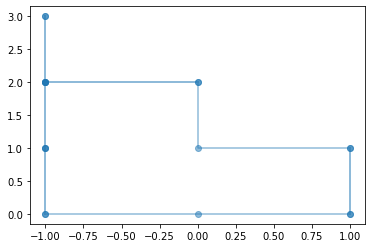

In [117]:
actions = np.array([[-1,0], [1,0], [0,-1], [0,1]])

x = np.array([actions[i] for i in np.random.randint(0, 4, size=20)])
x_cum = x.cumsum(axis=0)

plt.plot(x_cum[:,0], x_cum[:,1], '-o', alpha=.5)

以下では1次元のランダムウォークに限定する。
いま$X_1,\cdots,X_n$は互いに独立で、それぞれ確率$p$で1をとり、確率$q$で-1をとる確率変数とする。
時点$n$における粒子の位置は、
$$
S_n=X_1+\cdots+X_n
$$
と表現できる。ここで時点$n$において、位置$r$にいる確率を求める。
いま$(X_i+1)/2$は、ベルヌーイ試行列になる。したがって$B_n=(S_n+n)/2$とすれば、$B_n$の確率分布は二項分布である。
$$
\begin{align}
P(S_n=r)&=P(B_n=(n+r)/2)\\
&={}_nC_{(n+r)/2}p^{(n+r)/2}q^{(n-r)/2}\hspace{3mm}(n+r)が偶数かつ0\leq (n+r)/2\leq nのとき
&=0\hspace{3mm}その他
\end{align}
$$
を得る。次に原点を出発したランダムウォークが、原点に戻ってくる確率は、
$$
P(少なくとも一つn=1,2,\cdotsに対して、S_n=0)
$$
と表現できるが、これは
$$
1-|p-q|
$$
に等しいことが知られている。

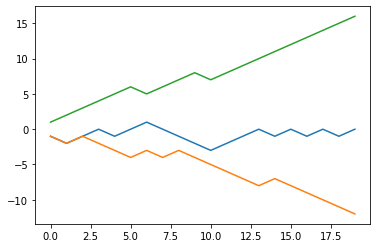

In [118]:
p1 = 0.5
p2 = 0.2
p3 = 0.8

x1 = np.array([np.random.binomial(1, p1) for _ in np.arange(20)])
x1[x1==0] = -1
x2 = np.array([np.random.binomial(1, p2) for _ in np.arange(20)])
x2[x2==0] = -1
x3 = np.array([np.random.binomial(1, p3) for _ in np.arange(20)])
x3[x3==0] = -1

plt.plot(x1.cumsum())
plt.plot(x2.cumsum())
plt.plot(x3.cumsum())

#### 破産問題
$A$と$B$の2人がいて、最初に$A$が$a$枚、$B$が$N-a$枚のチップを持っていたとする。
コインを投げ続け、表が出たときには$A$が$B$から1枚チップをもらい、逆に裏が出たときには、$A$が$B$に1枚チップをあげるとする。
どちらか一方の手持ちのチップがなくなり破産したときゲームは終了するものとする。
$A$のチップの枚数が、もし$N$に到達すれば$B$が破産したことになる。$0$と$N$は吸収壁とも呼ばれる。
コインの表が出る確率を$p$、裏が出る確率を$q(=1-p)$として、$A$の破産する確率を求める。
破産確率を$r(a)$と表す。いま事象$R,H$をそれぞれ
$$
R=\{Aがいつか破産する\}\\
H=\{第1回目にコインの表が出る\}
$$
と定義する。条件付き確率の性質から
$$
P(R)=P(R|H)P(H)+(P|H^c)P(H^c)
$$
である。$P(R|H)=r(a+1),P(R|H^c)=r(a-1)$である。したがって、$a=1,2,\cdots,N-1$に対して、差分方程式
$$
r(a)=pr(a+1)+qr(a-1)
$$
が成立する。ここで境界で成り立つべき性質
$$
r(0)=1,\hspace{3mm}p(N)=0
$$
を条件にして、差分方程式を解くと、破産確率$r(a)$は
$$
\begin{align}
r(a)&=\frac{(q/p)^N-(q/p)^a}{(q/p)^N-1}(p\neq qのとき)\\
&=1-a/N(p=qのとき)
\end{align}
$$
となる。
逆に$B$の破産する確率を$w(a)$とすれば、$p$と$q$、$a$と$N-a$をそれぞれ入れ替えればいいので
$$
\begin{align}
w(a)&=\frac{(p/q)^N-(q/p)^{N-a}}{(p/q)^N-1}(p\neq qのとき)\\
&=a/N(p=qのとき)
\end{align}
$$
となる。したがって、
$$
r(a)+w(a)=1
$$
が成立し、この賭けは$p\neq q$のときはもちろんのこと、$p=q$でもかならず勝負がつく。$p=q$のときは公平という。
このときの$A$の最終的な利益あるいは損失を$G$とすれば、$G$の期待値つまり期待利益は
$$
\begin{align}
E(G)&=(1-r(a))(N-a)+r(a)(-a)\\
&=N(1-r(a))-a
\end{align}
$$
である。したがって、$p=q$のときは$E(G)=0$である。
$A$あるいは$B$のどちらかが破産して賭けが終了するまでに、コインを投げた回数を$F$として、$F$の期待値つまり賭けの期待終了時間を求める。
これももちろん$a$に関係する。$P(R)$同様に
$$
E(F)=E(F|H)P(H)+E(F|H^c)P(H^c)
$$
が成立する。$e(a)=E(F)$とおけば
$$
E(F|H)=1+e(a+1),\hspace{3mm}E(F|H^c)=1+e(a-1)
$$
であるから、$a=1,2,\cdots,N-1$に対して、差分方程式
$$
e(a)=\{1+e(a+1)\}p+\{1+e(a-1)\}q
$$
が成立する。ここで、
$$
e(0)=e(N)=0
$$
を境界条件にして、差分方程式を解くと、期待終了時間として
$$
\begin{align}
e(a)&=\bigg(N\frac{(q/p)^a-1}{(q/p)^N-1}-a \bigg)\bigg/ (p-q)(p\neq qのとき)\\
&=a(N-a)(p=qのとき)
\end{align}
$$
が導ける。

### ブラウン運動
時点の間隔と、位置が変化する幅を同時に細かくしていったときに、ランダムウォークが極限においてどのように表現できるか考える。
ランダムウォーク$S_n$の期待値と分散は
$$
\begin{align}
E(S_n)&=nE(X_i)=n\{1\cdot p+(-1)\cdot q \}=n(p-q)\\
V(S_n)&=nV(X_i)=n\{p+q-(p-q)^2 \}=4npq
\end{align}
$$
である。
ここで1回に変化する幅を$\Delta r$単位、それにようする時間を$\Delta t$と細かくする。
このとき時間$t$の間に粒子は$t/\Delta t$回動く。したがって、$n$を$t/\Delta t$に、幅1単位を$\Delta r$単位に置き換えれば、時間$t$までの粒子の総変位の期待値と分散は、それぞれ
$$
(p-q)t(\Delta r/\Delta t),\hspace{5mm}4pqt(\Delta r)^2/\Delta t
$$
となる。$\Delta r$と$\Delta t$を0に近づける際に、$p-q$を$\Delta r$と同じ速度で0へ収束させて、期待値の極限も存在するようにする。
$$
2D=\lim_{\Delta t,\Delta r→0}\frac{(\Delta r)^2}{\Delta t},\hspace{3mm}p=1/2+\frac{C\Delta r}{2D},\hspace{3mm}q=1/2-\frac{C\Delta r}{2D}
$$
と表す。$D$と$C$は定数で、それぞれ$D$は拡散係数、$C$はずれ(drift)と呼ばれる。このときの期待値と分散は、それぞれ
$$
\begin{align}
(p-q)t\frac{\Delta r}{\Delta t}&=t\bigg(\frac{C}{D}\bigg)\frac{(\Delta r)^2}{\Delta t}\\
4prt\frac{(\Delta r)^2}{\Delta t}&=4\bigg(\frac{1}{2}-\frac{C\Delta r}{2D} \bigg)\bigg(\frac{1}{2}+\frac{C\Delta r}{2D} \bigg)t\frac{(\Delta r)^2}{\Delta t}\\
&=t\frac{(\Delta r)^2}{\Delta t}-\bigg(\frac{C\Delta r}{D} \bigg)^2t\frac{(\Delta r)^2}{\Delta t}
\end{align}
$$
ここで$\Delta r$と$\Delta t$を0に近づけると、時点$t$までの総変位の期待値と、分散の極限値は、それぞれ$2Ct$と$2Dt$になる。
したがって時点$t$における粒子の位置は、期待値$2Ct$、分散$2Dt$の正規分布$N(2Ct,2Dt)$に従う。これをブラウン運動と呼び、$B_t$とかく。

時点$s$から時点$t(0<s<t)$の間の増分$B_t-B_s$は、同様に期待値$2C(t-s)$、分散$2D(t-s)$の正規分布に従う。したがって、
$$
\begin{align}
Cov(B_t,B_s)&=(1/2)\{V(B_t)+V(B_s)-V(B_t-B_s) \}\\
&=D\{t+s-(t-s) \}=2Ds\hspace{3mm}(s<t)
\end{align}
$$
となる。
さらに$t_1<t_2\leq t_3<t_4$として、異時点間の増分$B_{t2}-B_{t1}$と$B_{t4}-B_{t3}$の共分散を考える。
$$
\begin{align}
Cov(B_{t2}-B_{t1},B_{t4}-B_{t3})&=Cov(B_{t2},B_{t4})-Cov(B_{t2},B_{t3})-Cov(B_{t1},B_{t4})+Cov(B_{t1},B_{t3})\\
&=2D(t_2-t_2-t_1+t_1)=0
\end{align}
$$
となり、無相関である。
B_{t2}-B_{t1}$と$B_{t4}-B_{t3}$は正規分布に従うので、これは独立性を意味する。
したがって、ブラウン運動は独立増分の正規過程ともいわれる。

### マルコフ連鎖
#### 推移確率
独立性の仮定をはずした、確率過程を組み立てることを考える。
ここでは時点0から離散的に観測し、また各時点での確率分布も離散的とする。とりうる値を状態と呼び、今後ことわりのないかぎり$1,2,\cdots,N$とする。
独立でない場合、将来の観測値は現在および過去の値の影響を受けるが、遠い過去になるに従いその影響の度合いは薄れると仮定するのは自然である。
さらに簡略化して、確率過程$\{X_n\}$において、将来の確率変数に対する条件付き確率分布が現在の値のみに依存するとき、つまり任意の$n$、任意の状態$j_0,j_1,\cdots,j_{n-1},j,k$に対して
$$
P(X_{n+1}=k|X_0=j_0,X_1=j_1,\cdots,X_{n-1}=j_{n-1},X_n=j)=P(X_{n+1}=k|X_n=j)
$$
が成立するとき、この確率過程はマルコフ性を持つという。
また$\{X_n\}$をマルコフ連鎖と呼ぶ。有限個の過去の値にも依存するときは多重マルコフ連鎖と呼ぶ。また条件付き分布が$n$に依存しないとき斉時マルコフ連鎖と呼ぶ。以下では斉時マルコフ連鎖について議論する。
このとき、状態が1期のうちに$j$から$k$へ移る確率
$$
p_{jk}=P(X_{n+1}=k|X_n=j)
$$
を、推移確率という。また、$p_{jk}$を$(j,k)$成分に持つ行列$P$を推移確率行列という。確率の性質から各行の成分は
$$
\sum_{k=1}^Np_{jk}=1
$$
をみたす(この性質は一般に確率行列といわれる)。

ランダムウォークでは、状態は$0,±1,±2,\cdots$であり、推移確率を
$$
p_{jk}=P(S_{n+1}=k|S_n=j)
$$
とおけば
$$
\begin{align}
p_{jk}&=p\hspace{3mm}(k=j+1のとき)\\
&=q\hspace{3mm}(k=j-1のとき)\\
&=0\hspace{3mm}(その他)
\end{align}
$$
である。一方、破産問題では$A$が$n$時点で保持するチップの枚数を$X_n$とすれば、状態は$0,1,\cdots,N$で、推移確率は
$$
\begin{align}
p_{jk}&=p\hspace{3mm}(1\leq j\leq N-1,k=j+1のとき)\\
&=q\hspace{3mm}(1\leq j\leq N-1,k=j-1のとき)\\
&=1\hspace{3mm}(j=k=0あるいはj=k=Nのとき)\\
&=0\hspace{3mm}(その他)
\end{align}
$$
となる。ここでもし相手が破産した場合、各々が確率$p$あるいは$q$で相手に一枚チップを施したとする。このときの推移確率は
$$
p_{00}=q,\hspace{3mm}p_{01}=p,\hspace{3mm}および\hspace{3mm}p_{N,N-1}=q,\hspace{3mm}p_{NN}=p
$$
となる。これを反射壁をもつランダムウォークという。

#### 行列による表現
マルコフ連鎖$\{X_n\}$で、2期先以降の状態に対する推移確率、推移確率行列を考える。いま、
$$
p_{jk}^{(2)}=P(X_{n+2}=k|X_n=j)
$$
とおく。$X_{n+1}$における状態は何でもよいので
$$
\begin{align}
p_{jk}^{(2)}&=\sum_{l=1}^NP(X_{n+2}=k,X_{n+1}=l|X_n=j)\\
&=\sum_{l=1}^NP(X_{n+2}=k|X_{n+1}=l,X_n=j)P(X_{n+1}=l|X_n=j)
\end{align}
$$
となる。さらに斉時マルコフ連鎖であることに注意すれば
$$
\begin{align}
&=\sum_{l=1}^NP(X_{n+2}=k|X_{n+1}=l)P(X_{n+1}=l|X_n=j)\\
&=\sum_{l=1}^Np_{lk}p_{jl}
\end{align}
$$
となる。2期先の推移確率行列は行列の積で$P\cdot P=P^2$、推移確率はその各成分である。同様にして$n$期先の状態に対する推移確率行列は$P^n$、推移確率$p_{jk}^{(n)}$はその各成分である。任意の自然数$m,n$に対して
$$
P^{m+n}=P^mP^n
$$
が成立するので
$$
p_{jk}^{(m+n)}=\sum_{l=1}^Np_{jl}^{(m)}p_{lk}^{(n)}
$$
である。これをチャップマン・コルモゴロフの方程式と呼ぶ。
次に時点$n$で、状態$j$である確率を求める。
$$
p_n(j)=P(X_n=j)\hspace{4mm}j=1,2,\cdots,N
$$
とおき、ベクトル$\boldsymbol{p}_n$を
$$
\boldsymbol{p}_n=(p_n(1),p_n(2),\cdots,p_n(N))
$$
と定義する。これを状態確率分布と呼ぶ。とくに時点0に対しては、$\boldsymbol{p}_0$を初期分布という。いま
$$
\begin{align}
p_n(j)&=\sum_{l=1}^NP(X_{n-1}=l)P(X_n=j|X_{n-1}=1)\\
&=\sum_{l=1}^Np_{n-1}(l)p_{lj}
\end{align}
$$
に注意すれば、ベクトル表現になおして
$$
\boldsymbol{p}_n=\boldsymbol{p}_{n-1}P
$$
が成立する。この式を順次繰り返せば
$$
\boldsymbol{p}_n=\boldsymbol{p}_0P^n
$$
を得る。
初期条件に無関係に$\boldsymbol{\pi}=\lim_{n→\infty}\boldsymbol{p}_n$が存在し、$\boldsymbol{\pi}=(\pi_1,\cdots,\pi_N)$が確率分布になっているとき、これを定常分布、あるいは不変分布と呼ぶ。
一般に、定常分布が存在するか否かの証明は難しい場合がある。
しかし存在を仮定すれば$n→\infty$として
$$
\boldsymbol{\pi}=\boldsymbol{\pi}P
$$
を満足する$\boldsymbol{\pi}$を求めればよい。

### ポアソン過程と出生死滅過程
#### ポアソン過程
連続的に観測する場合のマルコフ性も同様に、$s<t$に対して
$$
P(X_t<k|X_r=j_r(r<s),X_s=j)=P(X_t=k|X_s=j)
$$
で定義される。
任意の時間内$[0,t]$にある事象が起きた回数を$N_t$と表し、確率過程とみなしたのがポアソン過程である。
$N_t$は、状態$0,1,2,\cdots$をとる確率過程で、時点0では、確率1で$N_0=0$とする。
また区間が長いほど起きる回数は多くなるから$N_s\leq N_t(s\leq t)$である。
次に$0<s\leq t$として区間$[0,s]$と区間$[s,t]$とで起きる回数、つまり$N_s-N_0$と$N_t-N_s$とは独立とする。最後に推移確率に対しては
$$
P(N_{t+h}=n+1|N_t=n)=\lambda h+o(n)\\
P(N_{t+h}=n|N_t=n)=1-\lambda h+o(n)
$$
を仮定する。ここで一般に$o(h)$は、$h→0$のとき、$o(h)/h$が0へ収束する関数を表す数学記号である。
独立性より
$$
\begin{align}
P(N_{t+h}=n+1|N_t=n)&=P(N_{t+h}-N_t=1|N_t=n)\\
&=P(N_{t+h}-N_t=1)\\
&=\lambda h+o(h)
\end{align}
$$
および
$$
\begin{align}
P(N_{t+h}=n|N_t=n)&=P(N_{t+h}-N_t=0|N_t=n)\\
&=P(N_{t+h}-N_t=0)\\
&=1-\lambda h+o(h)
\end{align}
$$
を意味する。つまり区間$(t,t+h]$で起きる回数の確率は、$t$に依存せず区間の幅$h$のみによって決まる。従って、この仮定はベルヌーイ試行の定常性に相当する。推移確率に対して
$$
\begin{align}
P(N_{t+h}\geq n+2|N_t=n)&=1-P(N_{t+h}=nあるいはn+1|N_t=n)\\
&=1-\{\lambda h+o(h)\}-\{1-\lambda h+o(h)\}\\
&=o(h)
\end{align}
$$
が成立する。区間幅$h$が0に近づくとき、2回以上生起する確率は無視でき、微小な区間では状態の変化が緩やかであるとする。
この条件は希少性という。以上の条件のもとで
$$
P(N_t=k)=(\lambda t)^ke^{-\lambda t}/k!(k=0,1,\cdots)
$$
が成立する。

#### 出生死滅過程
増加と減少を共に含む現象を表現するマルコフ連鎖が一般に出生死滅過程である。
いま時点$t$におけるある細菌の総数を$L_t$とする。総数の増減について推移確率が、仮定
$$
P(L_{t+h}=k+1|L_t=k)=\lambda_kh+o(h)\\
P(L_{t+h}=k|L_t=k)=1-\lambda_kh-\mu_kh+o(h)\\
P(L_{t+h}=k-1|L_t=k)=\mu_kh+o(h)\\
P(L_{t+h}\leq k-2あるいは\geq k+2|L_t=k)=o(h)
$$
を満たすとき、$L_t$を出生死滅過程という。総個体数が$k$のとき、区間$(t,t+h]$において1つの個体が生まれる確率が
$$
\lambda_kh+o(h)
$$
であり、死滅する確率が
$$
\mu_k+o(h)
$$
である。ここで、
$$
p_k(t)=P(L_t=k)
$$
とおく。ポアソン過程の場合と同様の方法で、$k\geq 1$に対して
$$
p_k'(t)=-(\lambda_k+\mu_k)p_k(t)+\lambda_{k-1}p_{k-1}(t)+\mu_{k+1}p_{k+1}(t)
$$
$k=0$に対しては、0から減ることがないので
$$
p_'(t)=\lambda_0p_0(t)+\mu_1p_1(t)
$$
が導ける。
$\lambda_k$および$\mu_k$の値を変えることによりさまざまな確率過程を作り出すことができる。
$$
\lambda_k=\lambda,\hspace{4mm}\mu_k=0
$$
とおけば出生死滅過程はポアソン過程になる。また、$\lambda_k,\mu_k$を個体数に比例させ
$$
\lambda_k=k\lambda,\hspace{4mm}\mu_k=k\mu
$$
とおいたものを、フェラー・アレイ過程という。フェラー・アレイ過程で、死滅を考えず
$$
\mu_k=0
$$
としたとき、純出生過程あるいはユール過程という。
さらに、フェラー・アレイ過程で外部からの移民を考え、区間$(t,t+h]$の間に新たな個体が移住してくる確率を
$$
\nu h+o(h)
$$
とおいて
$$
\lambda_k=k\lambda+\nu
$$
としたとき、ケンドール過程という。
$p_k(t)$を機能的に導くことはできず、個別的に解を求めるしかないが、とくにフェラー・アレイ過程については、
$$
\begin{align}
p_0(t)&=\frac{\mu\{1-\exp((\lambda-\mu)t) \}}{\mu-\exp (\lambda-\mu)t}\hspace{3mm}(\mu\neq\lambdaのとき)\\
&=\lambda t/(1+\lambda t)\hspace{3mm}(\mu=\lambdaのとき)
\end{align}
$$
$k\geq 1$に対しては
$$
\begin{align}
p_k(t)&=\frac{\lambda^{k-1}(\lambda-\mu)^2e^{(\lambda-\mu)t}(1-e^{(\lambda-\mu)t})^{k-1}}{(\mu-\lambda e^{(\lambda-\mu)t})^{k+1}}\\
&=(\lambda t)^{k-1}/(1+\lambda t)^{k+1}
\end{align}
$$
が示されている。ただし、境界条件を
$$
p_1(0)=1,\hspace{3mm}p_k(0)=0\hspace{3mm}(k\neq 1)
$$
とする。